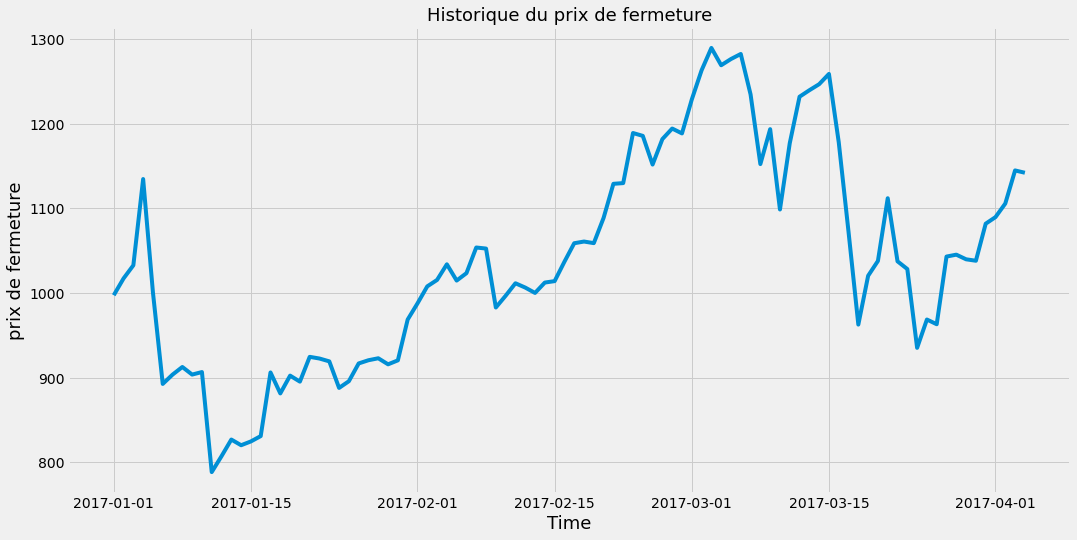

[1058.78640035067]
[962.95805458796]
[DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
               '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
               '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28',
               '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01',
               '2017-02-02', '2017-02-03', '2017-02-04', '2017-02-05',
               '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13',
               '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17',
               '2017-02-18', '2017-02-19', '2017-02-20', '2017-02-21',
               '2017-02-22', '2017-02-2

In [11]:
# Utilisation de la simple moving average pour prédire l'évolution du bitcoin

#librairies
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Chargement des données 
df = pd.read_csv('/Users/alexa/Downloads/btc.csv')

#set the date as the index
df = df.set_index(pd.DatetimeIndex(df['time'].values))
#show the data 
df = df.loc['2017':'2017-4-4']
df


#Visualisation du prix de fermeture 
plt.figure(figsize=(16,8))
plt.title('Historique du prix de fermeture',fontsize = 18)
plt.plot(df['PriceUSD'])
plt.xlabel('Time', fontsize=18)
plt.ylabel('prix de fermeture', fontsize = 18)
plt.show()

#Creation de la fonction qui va permettre de calculer la moyenne mobile simple (SMA)

def SMA(data, period = 30, column ='PriceUSD'):
    return data[column].rolling(window = period).mean()

#Création de 2 nouvelles colonnes pour stocker les valeurs des 20 et des 50 jours de SMA 

df['SMA20']= SMA(df, 20)
df['SMA50']= SMA(df, 50)

#Singal de vente et d'achat d'action Bitcoin 
df['Signal'] = np.where(df['SMA20'] > df['SMA50'],1,0)

df['Position'] = df['Signal'].diff()

df['Acheter'] = np.where(df['Position'] == 1, df['PriceUSD'], 0)

df['Vendre'] = np.where(df['Position'] == -1, df['PriceUSD'], 0)

PrixAchat = []
PrixVente = []
for i in df['Acheter']:
    if i != 0:
        PrixAchat.append(i)
print(PrixAchat)
    
for i in df['Vendre']:
    if i != 0:
        PrixVente.append(i)
print(PrixVente)



a = []
if np.where(df['Position'] == 1):
    a.append(df['Acheter'].index)

print(a)


Gain = []
for i in range (len(PrixAchat)):
    x = PrixAchat[i]
    y = PrixVente[i]
    Gain.append(x-y)
print(Gain)  



GainTotaux = []
for i in range (len(PrixAchat)):
    x = PrixAchat[i]
    y = PrixVente[i]
    GainTotaux.append(x-y)
    
mean = sum(GainTotaux)/len(GainTotaux)
print(mean)
print(GainTotaux)  


print(df['Acheter'].values)



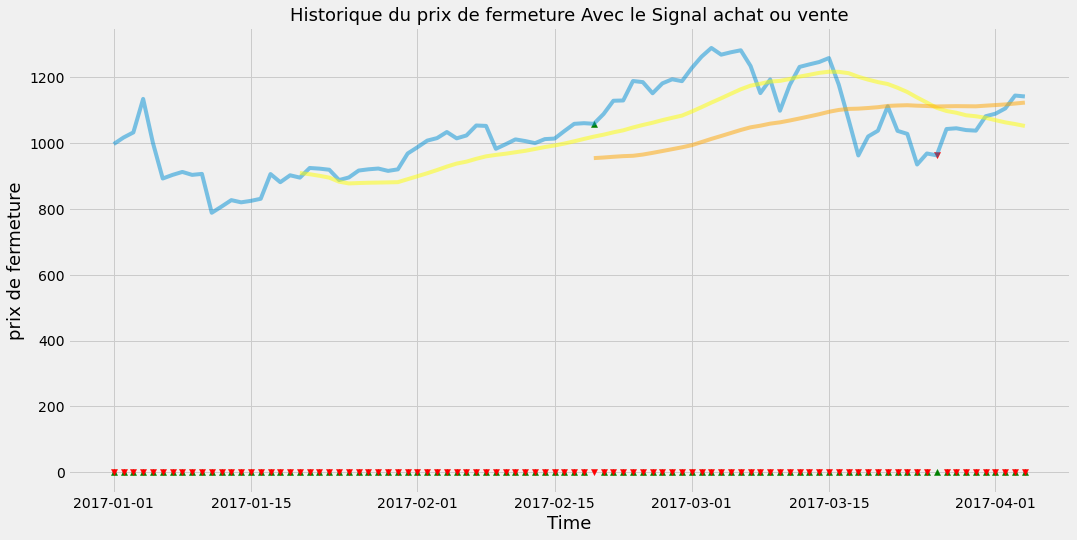

[95.82834576271]
95.82834576271


In [13]:
#Affichage du prix du Bitcoin avec la SMA et le singal d'achat et de vente Sur 4 mois
 
plt.figure(figsize=(16,8))
plt.title('Historique du prix de fermeture Avec le Signal achat ou vente',fontsize = 18)
plt.plot(df['PriceUSD'], alpha =0.5, label ='Prix Bitcoin')
plt.plot(df['SMA20'], alpha =0.5, label ='SMA20', color = 'yellow')
plt.plot(df['SMA50'], alpha =0.5, label ='SMA50', color = 'orange')
plt.scatter(df.index, df['Acheter'], alpha =1, label = 'Signal Achat', marker = '^', color = 'green')
plt.scatter(df.index, df['Vendre'], alpha =1, label = 'Signal Vente', marker = 'v', color = 'red')

plt.xlabel('Time', fontsize=18)
plt.ylabel('prix de fermeture', fontsize = 18)
plt.show()

print(Gain)
print(mean)